Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**IMPORTANT: DO NOT COPY OR SPLIT CELLS.** If you do, you'll mess the autograder. If need more cells to work or test things out, create a new cell. You may add as many new cells as you need.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and group below:

In [1]:
COURSE = "Unsupervised Learning 2021"
GROUP = "D8A"
NAME = "Tokiyomi" # Match your GitHub Classroom ID

---

# Assignment: Hierarchical Clustering

In [2]:
# Imports
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Part 1 (10 pts)

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = data['data']
y = data['target']

In [4]:
X.shape

(178, 13)

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
dic = {0:'class_0', 1:'class_1', 2:'class_2'}

This data is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

1. Scale the data (clustering is sensitive to scale)
2. Find the distance between pairs of all 13-dimensional vectors. Use `pdist`.
3. Use linkage to create the clusters, try different linkage methods.
4. Visualize your clusters using `dendrogram`.
5. Get the top 3 clusters using `fcluster`.
6. Compare your top 3 clusters to the actual data.

## Points: 1 and 2

In [7]:
# 1 and 2
scaled = StandardScaler().fit_transform(X)
D = pdist(scaled)

In [8]:
np.allclose(D[0], np.linalg.norm(scaled[1]-scaled[0]))

True

## Point 3

In [9]:
# single linkage method
Z_sl = linkage(scaled, 'single', optimal_ordering='True')

# Complete linkage
Z_cl = linkage(scaled, 'complete', optimal_ordering='True')

# Average linkage
Z_al = linkage(scaled, 'average', optimal_ordering='True')

# Ward linkage
Z_ward = linkage(scaled, 'ward', optimal_ordering='True')

## Point 4

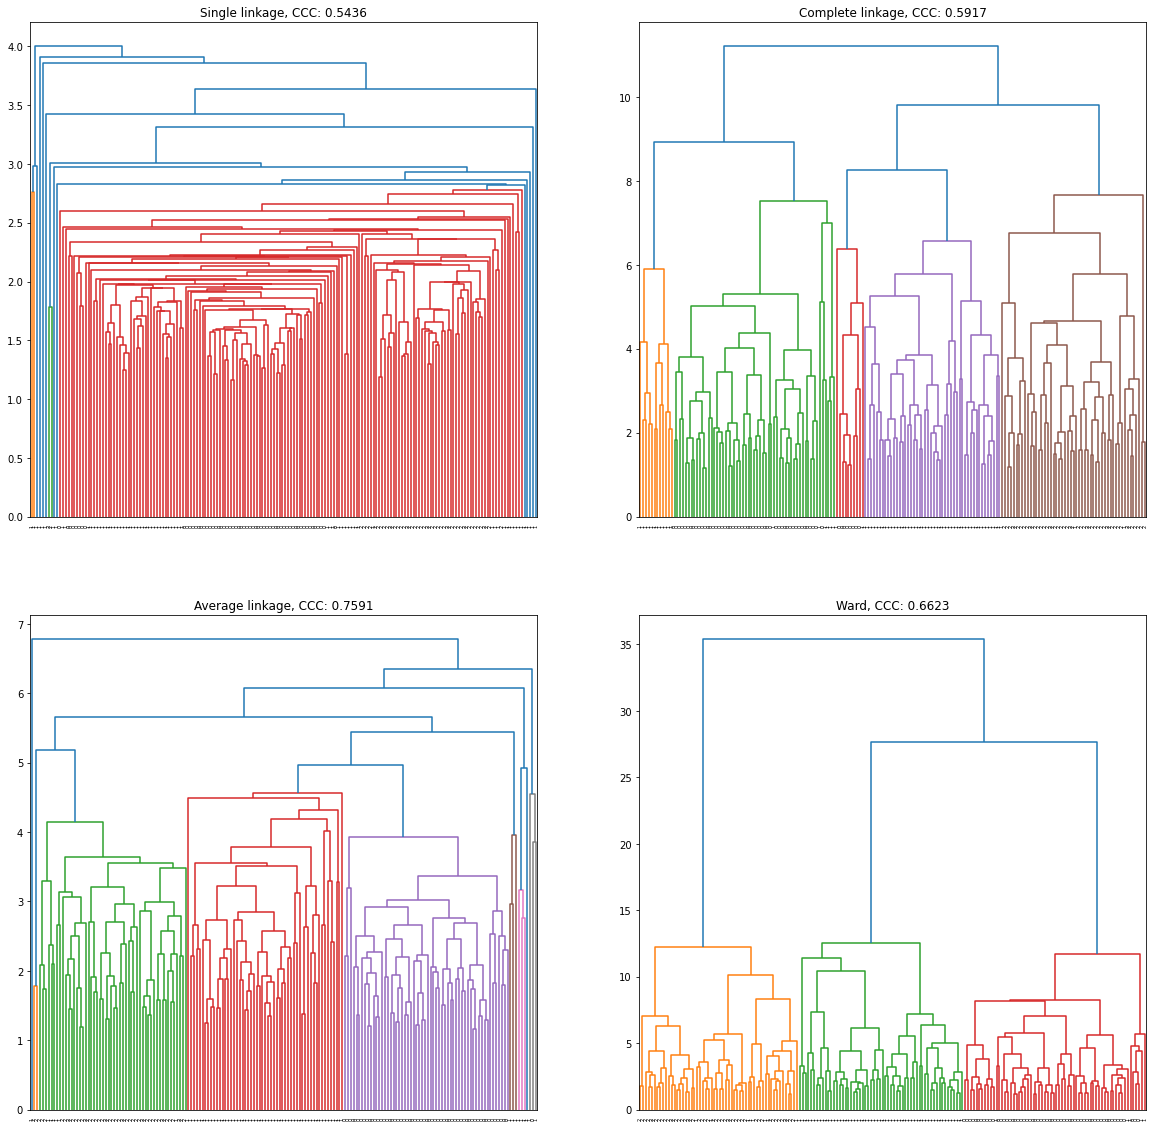

In [10]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title(f'Single linkage, CCC: {cophenet(Z_sl, D)[0]:0.4f}')
dendrogram(Z_sl, ax=ax[0,0], labels=y);

ax[0,1].set_title(f'Complete linkage, CCC: {cophenet(Z_cl, D)[0]:0.4f}')
dendrogram(Z_cl, ax=ax[0,1], labels=y);

ax[1,0].set_title(f'Average linkage, CCC: {cophenet(Z_al, D)[0]:0.4f}')
dendrogram(Z_al, ax=ax[1,0], labels=y);

ax[1,1].set_title(f'Ward, CCC: {cophenet(Z_ward, D)[0]:0.4f}')
dendrogram(Z_ward, ax=ax[1,1], labels=y);

## Point 5

In [11]:
# Specifying the distance at which to cut
#labels_1 = fcluster(Z_al, 90, criterion='distance')
#print(labels_1)

# Specifying the number of cluster
labels_1 = fcluster(Z_sl, 3, criterion='maxclust')
print(labels_1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
labels_2 = fcluster(Z_cl, 3, criterion='maxclust')
print(labels_2)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2
 2 1 1 1 1 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 1 3 2 2 2 1 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [13]:
labels_3 = fcluster(Z_al, 3, criterion='maxclust')
print(labels_3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
labels_4 = fcluster(Z_ward, 3, criterion='maxclust')
print(labels_4)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 2 2 2 3 3 2 1 2 1 3 2 3
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
# original
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Point 6

In [16]:
#df = pd.DataFrame(X)
#df['target'] = y
#df.head()

In [17]:
#sns.pairplot(df, height=3, hue='target', palette=['green','orange','blue']) # choose features for 2D plot that strongly identify the division between clusters

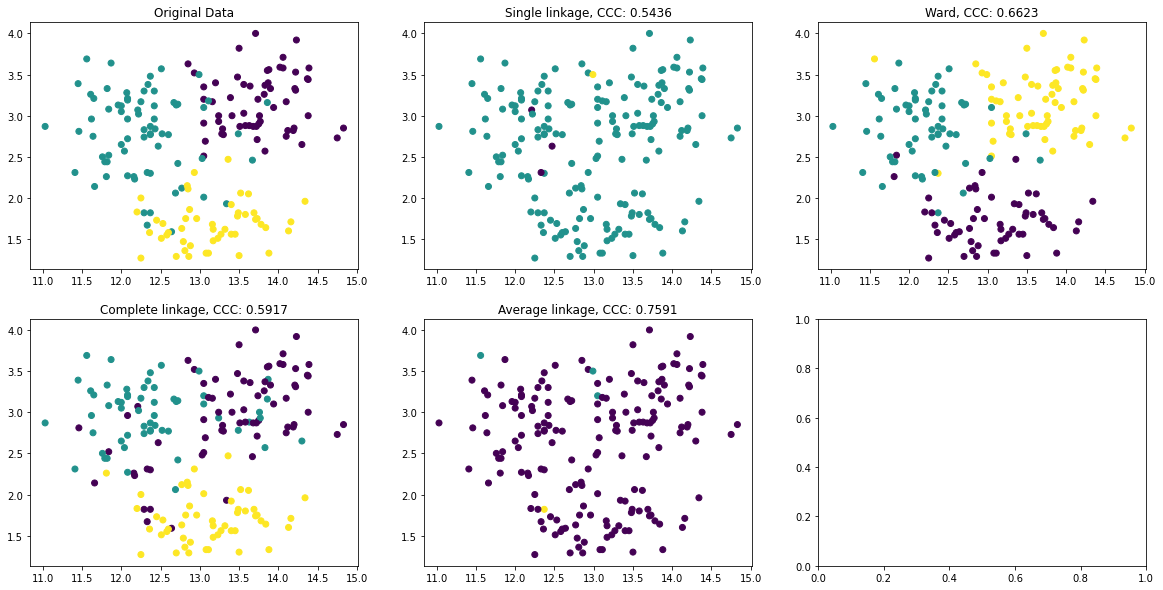

In [18]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax[0,0].set_title(f'Original Data')
ax[0,0].scatter(x=X[:,0], y=X[:,11], c=y);

ax[0,1].set_title(f'Single linkage, CCC: {cophenet(Z_sl, D)[0]:0.4f}')
ax[0,1].scatter(x=X[:,0], y=X[:,11], c=labels_1);

ax[1,0].set_title(f'Complete linkage, CCC: {cophenet(Z_cl, D)[0]:0.4f}')
ax[1,0].scatter(x=X[:,0], y=X[:,11], c=labels_2);

ax[1,1].set_title(f'Average linkage, CCC: {cophenet(Z_al, D)[0]:0.4f}')
ax[1,1].scatter(x=X[:,0], y=X[:,11], c=labels_3);

ax[0,2].set_title(f'Ward, CCC: {cophenet(Z_ward, D)[0]:0.4f}')
ax[0,2].scatter(x=X[:,0], y=X[:,11], c=labels_4);

### From these plots we can see that the linkage methods that better perform for this data are the Ward and the Complete linkages ;D

In [19]:
# Build table with label count
def df_counts(labelss):
    labels = y
    unique_labels = np.unique(labels)
    l_counts = []
    C = labelss-1
    for k in range(3):
        k_counts = []
        # Look at members of cluaster k
        y_k = labels[C==k]
        # Count # isntances of each label in cluster k
        for label in unique_labels:
            k_counts.append((y_k == label).sum())
        l_counts.append(k_counts)
        #print(k,l_counts)

    df = pd.DataFrame(data=l_counts, columns=unique_labels)
    df = df.rename(columns=dic)
    return df

In [20]:
# Original
a = df_counts(y+1)

In [21]:
# Single Linkage
b = df_counts(labels_1)

In [22]:
# Complete Linkage
c = df_counts(labels_2)

In [23]:
# Average Linkage
d = df_counts(labels_3)

In [24]:
# Ward Linkage
e = df_counts(labels_4)

In [25]:
df = pd.concat([a,b,c,d,e], axis = 1, keys=(['original','single','complete','average','ward']))
df

original                  single                 complete                  \
   class_0 class_1 class_2 class_0 class_1 class_2  class_0 class_1 class_2   
0       59       0       0       0       3       0       51      18       0   
1        0      71       0      59      67      48        8      50       0   
2        0       0      48       0       1       0        0       3      48   

  average                    ward                  
  class_0 class_1 class_2 class_0 class_1 class_2  
0      58      68      48       0       8      48  
1       1       2       0       0      58       0  
2       0       1       0      59       5       0

## Part 2 (Optional)

Now that you have worked with the `scipy` hierarchical clustering functions. It would be useful to try and implement them yourself - to appreciate what's happening beneath the surface. Also to strengthen your command of numpy and linear algebra concepts.

You could use any dataset you'd like, for example the Iris dataset. Or you can just create your own data as you see fit.

In this assignment, I want you to implement - from scratch - the function `linkage`. You may choose to use either a compact distance matrix, as in `pdist`, or a square distance matrix. Implement the function for singel linkage, complete linkage, and average linkage methods.

Verify the same output is obtained as in SciPy's linkage function.

In [26]:
def my_pdist(arguments):
    # YOUR CODE HERE
    raise NotImplementedError()